In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [2]:
df = pd.read_csv("\\archive\\spam.csv", encoding='latin-1')

In [3]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df['target'] = df['target'].map({'ham': 0, 'spam': 1})
df.drop_duplicates(inplace=True)

In [4]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paray\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [ps.stem(word) for word in text if word.isalnum() and word not in stop_words and word not in string.punctuation]
    return " ".join(text)
df['transformed_text'] = df['text'].apply(transform_text)

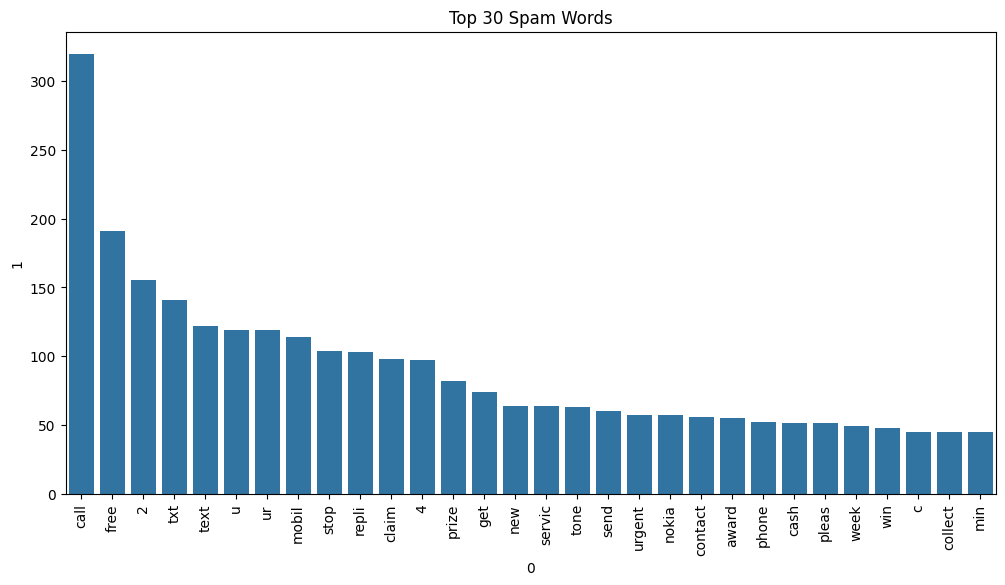

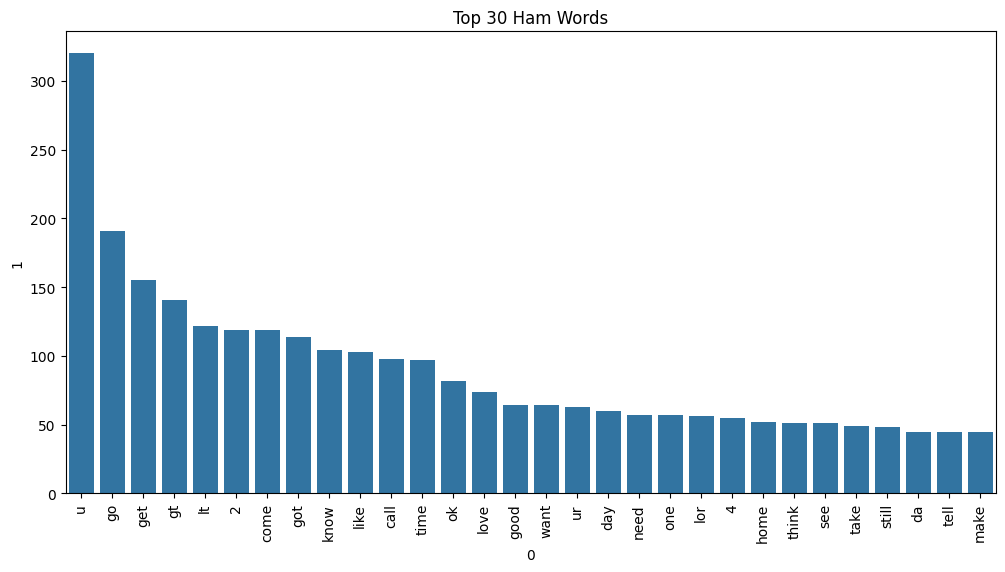

In [6]:
spam_corpus = [word for msg in df[df['target'] == 1]['transformed_text'].tolist() for word in msg.split()]
ham_corpus = [word for msg in df[df['target'] == 0]['transformed_text'].tolist() for word in msg.split()]

plt.figure(figsize=(12, 6))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Top 30 Spam Words')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Top 30 Ham Words')
plt.show()

In [7]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('Multinomial Naive Bayes:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))


Multinomial Naive Bayes:
Accuracy: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision: 1.0
